In [1]:
import pandas as pd

data = pd.read_csv("kommune_clean.csv")
data.head()

,Unnamed: 0,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.0,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,2,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.0,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
2,3,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,8.0,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
3,4,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.0,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0
4,5,1.0,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.0,...,1.0,18,NaN,2.0,1.0,2.0,4.0,NaN,5.0,2.0


In [2]:
data.shape

(3359, 101)

In [15]:
print(data.shape)
data = data.dropna() #just doing this for now, as I cant be bothered to deal with it
print(data.shape)

(3359, 101)
(1773, 101)


In [3]:
import random

#random.seed(2809)
#random.shuffle(data)

data = data[data.Q16 != 11.0]
data = data[data.Q16 != 12.0]
data = data[data.Q16 != 13.0]
print(data.shape)

dev_test = data[:100] # maybe I should not priorotize having thissince my data is so small?
#final_test = data[370:740]
train = data[100:]

(2705, 101)


In [4]:
from sklearn import tree

target = train["Q16"]
train_x = train.drop(['Q16'],axis=1).values

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(train_x, target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [46]:
print(clf.predict(dev_test[:10].drop(['Q16'],axis=1).values))
print(dev_test.Q16[:10])

[3. 3. 1. 3. 3. 1. 3. 3. 3. 3.]
0     7.0
2     1.0
3     9.0
5     9.0
7     5.0
9     7.0
11    1.0
15    3.0
18    8.0
19    2.0
Name: Q16, dtype: float64


[Text(558.0, 951.3000000000001, 'Q64a_8 <= 0.5\ngini = 0.826\nsamples = 1350\nvalue = [359, 122, 363, 61, 96, 39, 102, 101, 74, 33]'),
 Text(279.0, 679.5, 'Kommunestr <= 3.5\ngini = 0.818\nsamples = 1270\nvalue = [347, 117, 353, 32, 90, 37, 96, 96, 71, 31]'),
 Text(139.5, 407.70000000000005, 'Q58a <= 1.5\ngini = 0.817\nsamples = 839\nvalue = [249, 94, 207, 26, 33, 20, 89, 50, 47, 24]'),
 Text(69.75, 135.89999999999998, 'gini = 0.819\nsamples = 592\nvalue = [154, 80, 163, 18, 22, 12, 54, 35, 35, 19]'),
 Text(209.25, 135.89999999999998, 'gini = 0.787\nsamples = 247\nvalue = [95, 14, 44, 8, 11, 8, 35, 15, 12, 5]'),
 Text(418.5, 407.70000000000005, 'Q13_1 <= 3.5\ngini = 0.796\nsamples = 431\nvalue = [98, 23, 146, 6, 57, 17, 7, 46, 24, 7]'),
 Text(348.75, 135.89999999999998, 'gini = 0.739\nsamples = 138\nvalue = [21, 17, 63, 2, 9, 1, 2, 10, 8, 5]'),
 Text(488.25, 135.89999999999998, 'gini = 0.802\nsamples = 293\nvalue = [77, 6, 83, 4, 48, 16, 5, 36, 16, 2]'),
 Text(837.0, 679.5, 'Fylke <= 6

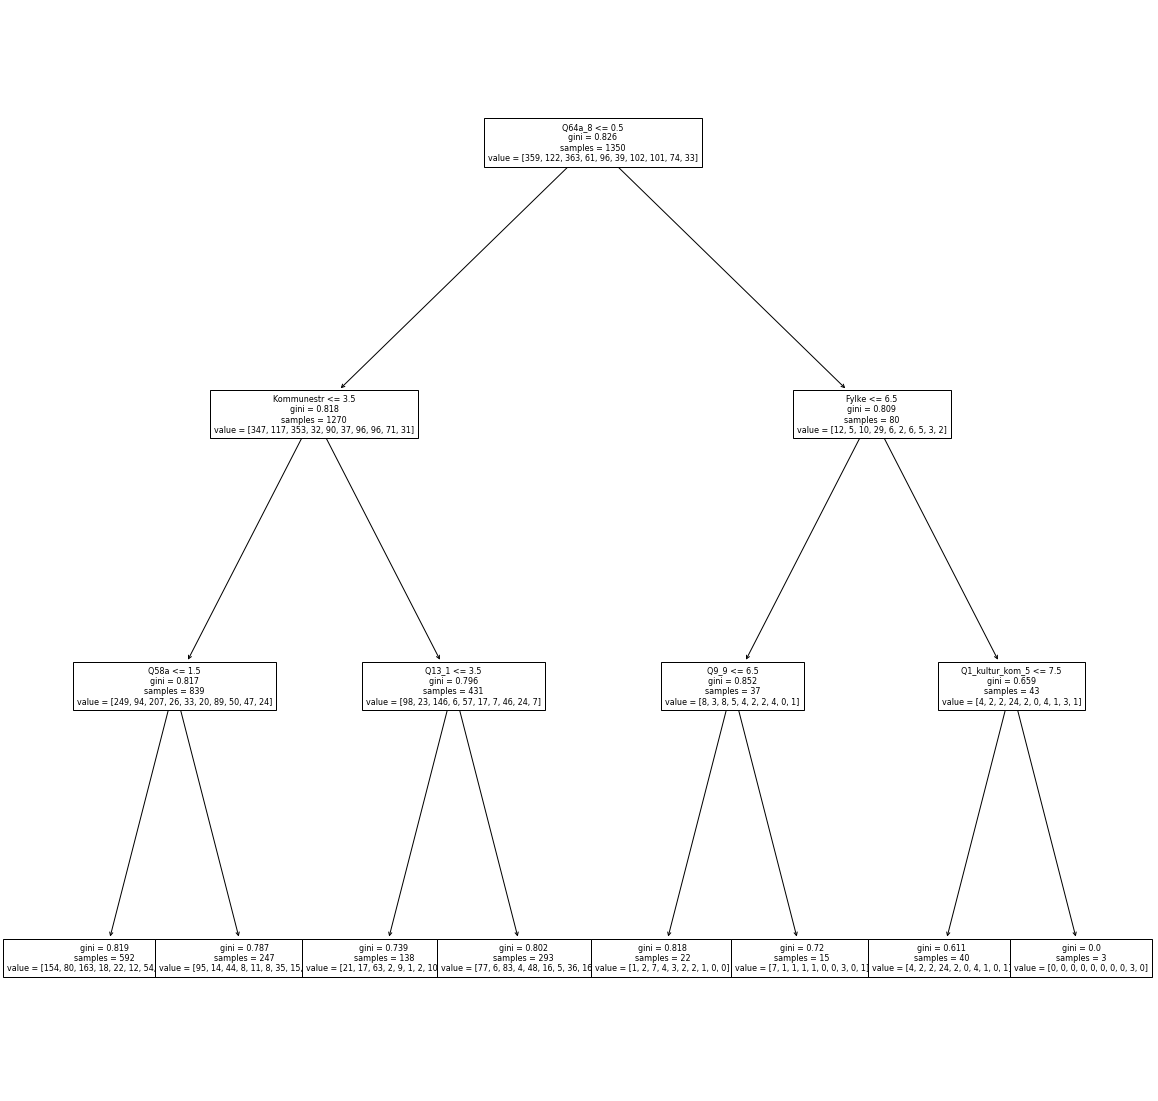

In [47]:
import matplotlib.pyplot as plt
#print(list(train.drop(['Q16'],axis=1)))
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=8, feature_names=list(train.drop(['Q16'],axis=1)))